   # TP53: Effects of Mutation on Interacting Proteins

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
gene = 'TP53'

## TP53 Mutational Effects on p53

<b>Build dataframe for plotting</b>

In [4]:
proteomicsdf = CPTAC.compare_mutations(proteomics, gene)
proteomicsdf = proteomicsdf.loc[proteomicsdf['Patient_Type'] == 'Tumor'][['Mutation', gene]]

In [5]:
phosdf = CPTAC.compare_mutations(phos, gene)
phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'][['TP53-S315']]

In [6]:
plotdf = proteomicsdf.join(phosdf)
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Truncating',
                                      'Frame_Shift_Ins': 'Truncating',
                                      'Nonsense_Mutation': 'Truncating',
                                      'Wildtype': 'Control',
                                      'Missense_Mutation': 'Missense'}})
plotdf = pd.melt(plotdf, id_vars=['Mutation'], value_vars=['TP53', 'TP53-S315'], var_name='Type', value_name='Reading')
plotdf = plotdf.loc[(plotdf["Mutation"] == "Control") | (plotdf["Mutation"] == "Missense") | (plotdf["Mutation"] == "Truncating")]
plotdf = plotdf.dropna(axis=0)
plotdf.head(5)

,Mutation,Type,Reading
0,Missense,TP53,0.32
1,Control,TP53,0.28
2,Control,TP53,-0.83
3,Control,TP53,-0.32
4,Missense,TP53,3.05


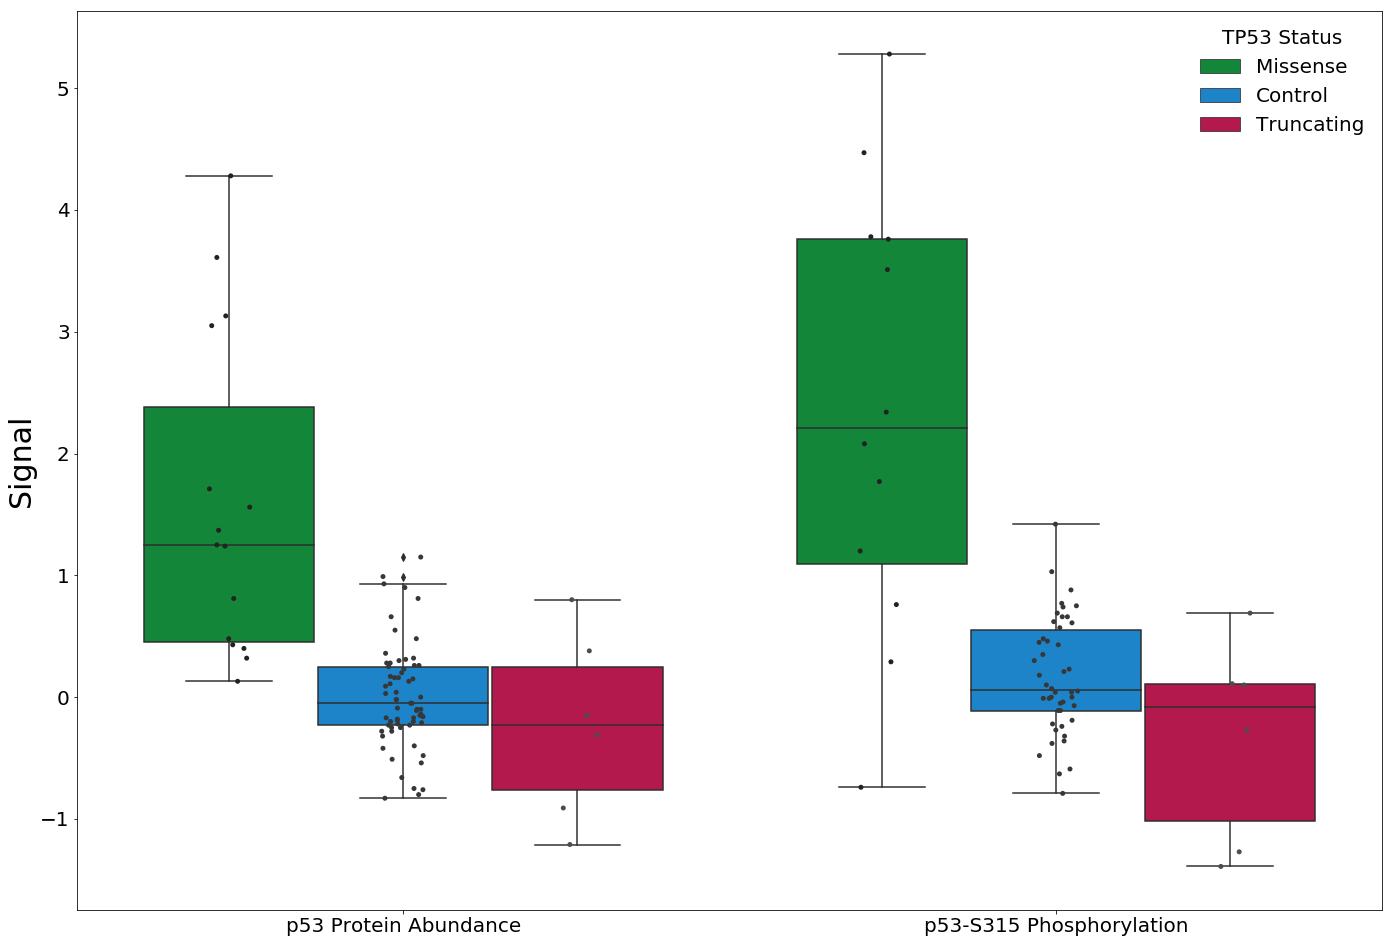

In [7]:
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Missense": "#009933", "Control": "#008ae6", "Truncating": "#cc0044"}

#Create the plot
boxplt = sns.boxplot(x='Type', y='Reading', hue='Mutation', data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Type', y='Reading', hue='Mutation', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Signal', fontsize='30')
boxplt.set_xticklabels(['p53 Protein Abundance', 'p53-S315 Phosphorylation'])
boxplt.tick_params(labelsize='20')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], ['Missense', 'Control', 'Truncating'], title='TP53 Status', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
boxplt.get_legend().set_bbox_to_anchor((1, 1, 0, 0))


fig = boxplt.get_figure()
fig.savefig('p53_cis.png', dpi=300)
plt.show()

## TP53 and CABLES1

### Retrieve the data (only significant phosphorylation sites as determined by previous tests are included)

In [20]:
protein = 'CABLES1'
proteomicsdf = CPTAC.compare_mutations(proteomics, protein, gene)
proteomicsdf = proteomicsdf.loc[proteomicsdf['Patient_Type'] == 'Tumor'][[protein]]

In [34]:
phosdf = CPTAC.compare_mutations(phos, protein, gene)
phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis=1).drop('CABLES1-S291', axis=1)

### Control/Truncating/Missense Plot

In [35]:
plotdf = proteomicsdf.join(phosdf)
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Truncating',
                                      'Frame_Shift_Ins': 'Truncating',
                                      'Nonsense_Mutation': 'Truncating',
                                      'Wildtype': 'Control',
                                      'Missense_Mutation': 'Missense'}})
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Type', value_name='Reading')
plotdf = plotdf.loc[(plotdf["Mutation"] == "Control") | (plotdf["Mutation"] == "Missense") | (plotdf["Mutation"] == "Truncating")]
plotdf = plotdf.dropna(axis=0)

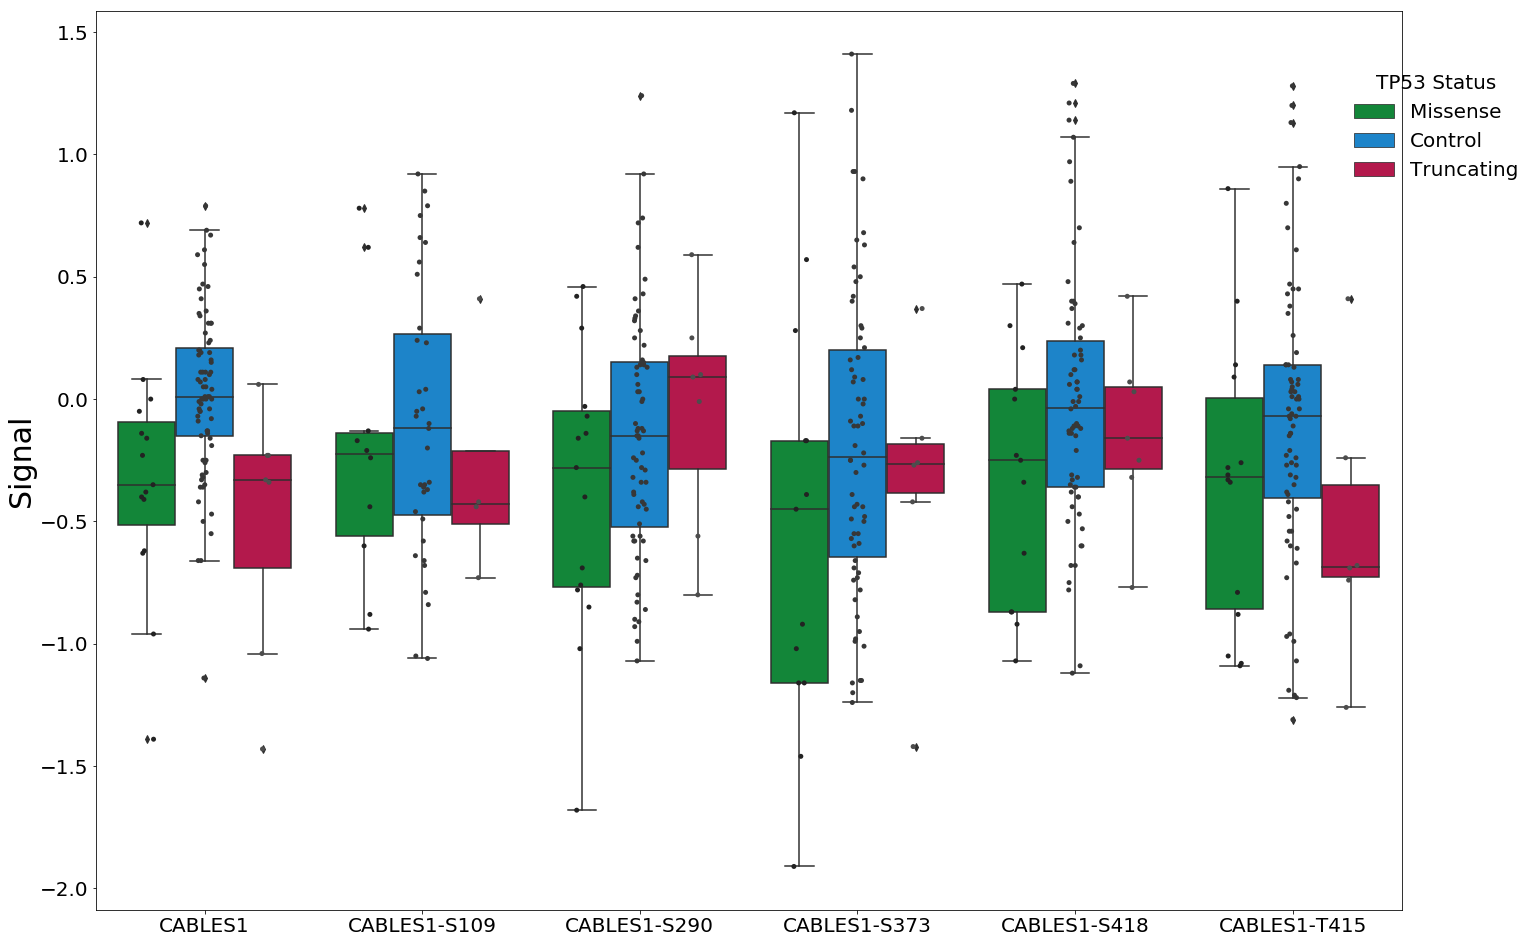

In [36]:
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Missense": "#009933", "Control": "#008ae6", "Truncating": "#cc0044"}

#Create the plot
boxplt = sns.boxplot(x='Type', y='Reading', hue='Mutation', data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Type', y='Reading', hue='Mutation', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Signal', fontsize='30')
#boxplt.set_xticklabels(['p53 Protein Abundance', 'p53-S315 Phosphorylation'])
boxplt.tick_params(labelsize='20')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], ['Missense', 'Control', 'Truncating'], title='TP53 Status', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
boxplt.get_legend().set_bbox_to_anchor((0.95, 0.95, 0, 0))

### Mutated/Non-Mutated Plot

In [42]:
plotdf = proteomicsdf.join(phosdf)
print(plotdf.head(200))
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Mutated',
                                      'In_Frame_Del': 'Mutated',
                                      'Frame_Shift_Ins': 'Mutated',
                                      'Nonsense_Mutation': 'Mutated',
                                      'Wildtype': 'Control',
                                      'Missense_Mutation': 'Mutated',
                                     'Splice_Site': 'Mutated'}})
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Type', value_name='Reading')
plotdf = plotdf.loc[(plotdf["Mutation"] == "Control") | (plotdf["Mutation"] == "Mutated")]
plotdf = plotdf.dropna(axis=0)

      CABLES1  CABLES1-S109  CABLES1-S290  CABLES1-S373  CABLES1-S418  \
S001     0.08          0.62          0.29          0.57           NaN   
S002     0.10           NaN         -0.34         -0.60          1.07   
S003    -0.13           NaN          0.34          0.65         -0.01   
S004     0.31           NaN           NaN         -0.22         -0.13   
S005    -1.39           NaN         -1.68         -1.91         -0.23   
S006    -0.66           NaN         -0.80         -0.11          0.07   
S007     0.72          0.78          0.46          1.17          0.30   
S008    -0.34           NaN          0.09         -0.26          0.03   
S009    -0.26           NaN         -0.25         -0.55         -0.14   
S010     0.24           NaN          0.49           NaN          0.04   
S011     0.19         -0.49         -0.73         -0.98         -0.11   
S012    -1.43          0.41          0.59         -1.42         -0.16   
S013    -0.07         -0.34         -0.42         -

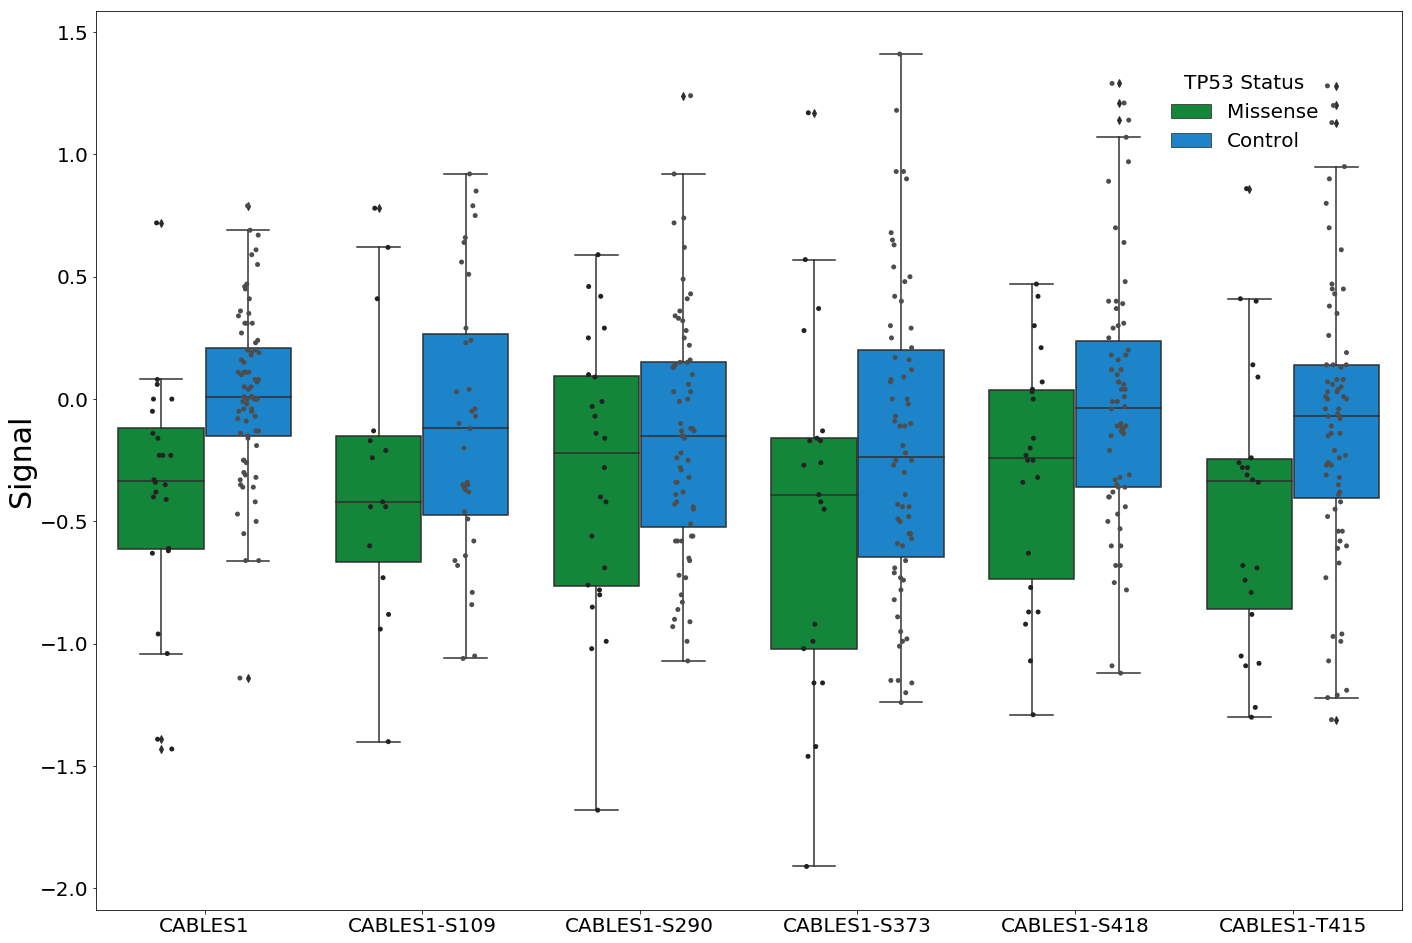

In [43]:
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Mutated": "#009933", "Control": "#008ae6"}

#Create the plot
boxplt = sns.boxplot(x='Type', y='Reading', hue='Mutation', data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Type', y='Reading', hue='Mutation', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Signal', fontsize='30')
#boxplt.set_xticklabels(['p53 Protein Abundance', 'p53-S315 Phosphorylation'])
boxplt.tick_params(labelsize='20')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], ['Missense', 'Control'], title='TP53 Status', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
boxplt.get_legend().set_bbox_to_anchor((0.95, 0.95, 0, 0))

## TP53 and AURKA

In [12]:
protein = 'AURKA'
proteomicsdf = CPTAC.compare_mutations(proteomics, protein, gene)
proteomicsdf = proteomicsdf.loc[proteomicsdf['Patient_Type'] == 'Tumor'][[protein, 'Mutation']]

In [13]:
plotdf = proteomicsdf
plotdf['Type'] = 'AURKA'
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Truncating',
                                      'Frame_Shift_Ins': 'Truncating',
                                      'Nonsense_Mutation': 'Truncating',
                                      'Wildtype': 'Control',
                                      'Missense_Mutation': 'Missense'}})
plotdf = plotdf.loc[(plotdf["Mutation"] == "Control") | (plotdf["Mutation"] == "Missense") | (plotdf["Mutation"] == "Truncating")]
plotdf = plotdf.dropna(axis=0)

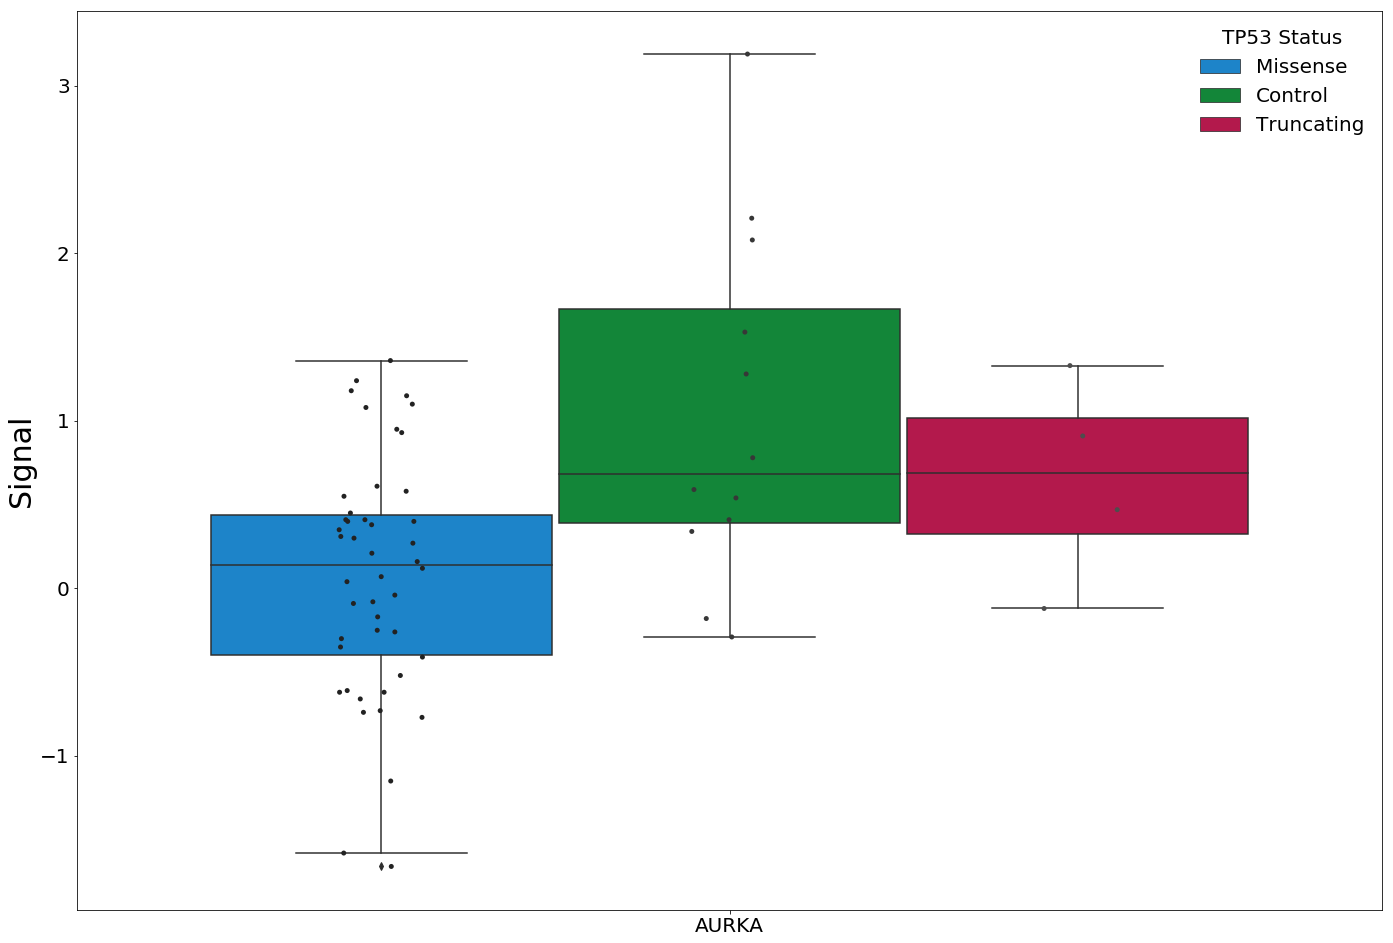

In [14]:
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Missense": "#009933", "Control": "#008ae6", "Truncating": "#cc0044"}

#Create the plot
boxplt = sns.boxplot(x='Type', y=protein, hue='Mutation', order='data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Type', y=protein, hue='Mutation', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Signal', fontsize='30')
#boxplt.set_xticklabels(['p53 Protein Abundance', 'p53-S315 Phosphorylation'])
boxplt.tick_params(labelsize='20')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], ['Missense', 'Control', 'Truncating'], title='TP53 Status', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
boxplt.get_legend().set_bbox_to_anchor((1, 1, 0, 0))

fig = boxplt.get_figure()
fig.savefig('p53_aurka.png', dpi=300)
plt.show()

## TP53 and FAS

In [15]:
protein = 'FAS'
proteomicsdf = CPTAC.compare_mutations(proteomics, protein, gene)
proteomicsdf = proteomicsdf.loc[proteomicsdf['Patient_Type'] == 'Tumor'][[protein]]

In [16]:
phosdf = CPTAC.compare_mutations(phos, protein, gene)
phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis=1)

In [17]:
plotdf = proteomicsdf.join(phosdf)
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Truncating',
                                      'Frame_Shift_Ins': 'Truncating',
                                      'Nonsense_Mutation': 'Truncating',
                                      'Wildtype': 'Control',
                                      'Missense_Mutation': 'Missense'}})
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Type', value_name='Reading')
plotdf = plotdf.loc[(plotdf["Mutation"] == "Control") | (plotdf["Mutation"] == "Missense") | (plotdf["Mutation"] == "Truncating")]
plotdf = plotdf.dropna(axis=0)

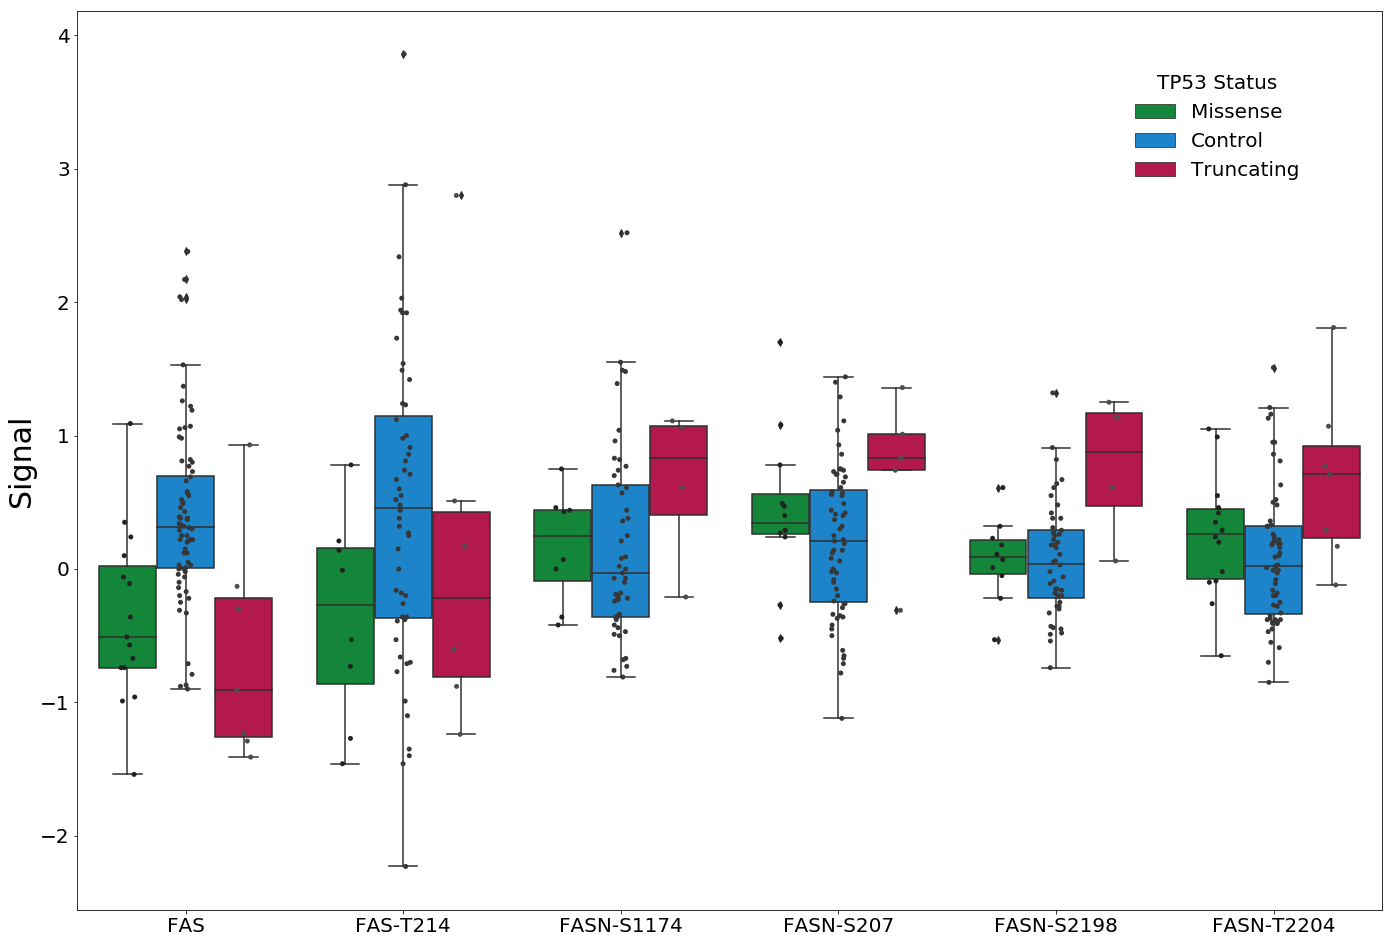

In [18]:
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Missense": "#009933", "Control": "#008ae6", "Truncating": "#cc0044"}

#Create the plot
boxplt = sns.boxplot(x='Type', y='Reading', hue='Mutation', data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Type', y='Reading', hue='Mutation', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Signal', fontsize='30')
#boxplt.set_xticklabels(['p53 Protein Abundance', 'p53-S315 Phosphorylation'])
boxplt.tick_params(labelsize='20')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], ['Missense', 'Control', 'Truncating'], title='TP53 Status', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
boxplt.get_legend().set_bbox_to_anchor((0.95, 0.95, 0, 0))